In [1]:
import random
from simulation import Settings, Simulation
from tqdm import tqdm
import matplotlib.pyplot as plt


random.seed('covid-19')

Default settings:
```
population_size = 10000
worker_percent = 0.6
students_percent = 0.2
commercial_areas = 20
school_areas = 5
social_areas = 30
visit_probability = 0.0002
social_probability = 0.0004

# Virus Settings
start_manifest = 2
manifest_up_to = 6
spread_probability = 0.0015
recovery_time = 4
mortality_rate = 0.09
reinfect_probability = 0.0001

allow_work = True
allow_visits = True
allow_social = True
allow_schools = True
```

In [2]:
pop_size = 1000

In [3]:
def runtime(settings, days = 20, infect_count = 1, on_tick = None):
    sim = Simulation(settings)
    
    for i in range(0, infect_count):
        sim.infect(sim.individuals[i])
    for i in tqdm(range(0, 24 * 60 * days)):
        sim.tick()
        if on_tick != None:
            on_tick(i, sim)
    
    plt.plot(sim.stats.infected_hist, label = "Infected")
    plt.plot(sim.stats.deaths_hist, label = "Fatalities")
    plt.plot(sim.stats.hospitalized_hist, label = "Hospitalised")
    plt.legend()
    plt.show()
    
    return sim

In [7]:
## Normal Scenario - No Quarantine - Virus Evolution in open environment

100%|██████████| 28800/28800 [01:57<00:00, 245.16it/s]


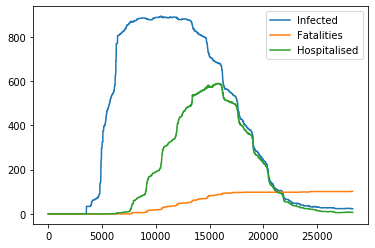

In [4]:
settings = Settings()
settings.population_size = pop_size
sim = runtime(settings)

## Quarantine everbody if  infected population is over 10%

100%|██████████| 28800/28800 [01:53<00:00, 254.53it/s]


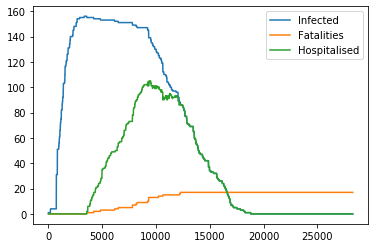

In [5]:
def on_tick(iteration, sim):
    if sim.stats.infected > 0.1 * sim.settings.population_size:
        sim.settings.allow_work = False
        sim.settings.allow_visits = False
        sim.settings.allow_social = False
        sim.settings.allow_schools = False

        
settings = Settings()
settings.population_size = pop_size
sim = runtime(settings, on_tick = on_tick)

## Allow only schools if infected population is over 10%

100%|██████████| 28800/28800 [01:57<00:00, 245.12it/s]


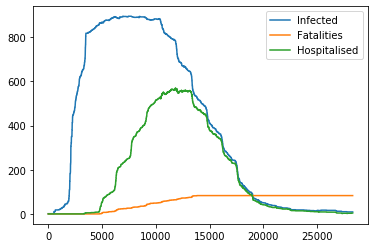

In [6]:
def on_tick(iteration, sim):
    if sim.stats.infected > 0.1 * sim.settings.population_size:
        sim.settings.allow_schools = True

settings = Settings()
settings.population_size = pop_size
sim = runtime(settings, on_tick = on_tick)